SECTION 1: Import Libraries  

This block loads all required libraries for data handling, machine learning, and visualization.
It prepares the environment to build and evaluate the AI-based appliance detection system.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

SECTION 2: Generate Synthetic Appliance Data

Functionality:
This block simulates real household appliances turning ON and OFF with predefined power ratings.
It creates a combined smart meter signal by adding all appliance power values.

In [42]:
# Time simulation
time = np.arange(0, 1000)

# Appliance ON/OFF patterns
fan_on = np.random.choice([0, 1], size=1000)
fridge_on = np.random.choice([0, 1], size=1000)
ac_on = np.random.choice([0, 1], size=1000)
heater_on = np.random.choice([0, 1], size=1000)

# Power ratings
fan = fan_on * 75
fridge = fridge_on * 150
ac = ac_on * 1500
heater = heater_on * 2000

# Aggregate smart meter reading
total_power = fan + fridge + ac + heater

data = pd.DataFrame({
    "Fan_ON": fan_on,
    "Fridge_ON": fridge_on,
    "AC_ON": ac_on,
    "Heater_ON": heater_on,
    "Total_Power": total_power
})

Graph 1: Aggregate Smart Meter Signal

Functionality:
This graph shows total power consumption over time from all appliances combined.
It represents how a real single smart meter records fluctuating energy usage.

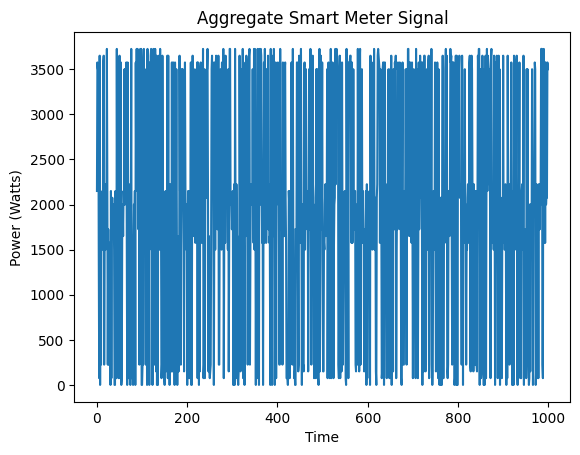

In [43]:
plt.figure()
plt.plot(time, total_power)
plt.title("Aggregate Smart Meter Signal")
plt.xlabel("Time")
plt.ylabel("Power (Watts)")
plt.show()

SECTION 3: Feature Engineering

Functionality:
This block extracts statistical features (mean, standard deviation, max) from the total power signal.
These features help the ML model recognize appliance-specific patterns.

In [44]:
data["Mean"] = data["Total_Power"].rolling(window=5).mean()
data["Std"] = data["Total_Power"].rolling(window=5).std()
data["Max"] = data["Total_Power"].rolling(window=5).max()
data = data.fillna(0)

SECTION 4: Train Random Forest Model

Functionality:
This block trains a machine learning model to detect whether the AC is ON or OFF.
It learns patterns from statistical features and evaluates prediction accuracy.

In [45]:
X = data[["Mean", "Std", "Max"]]
y = data["AC_ON"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.625


Graph 2: Confusion Matrix

Functionality:
This graph shows how accurately the model predicts AC ON and OFF states.
It compares actual values with predicted values to measure performance.

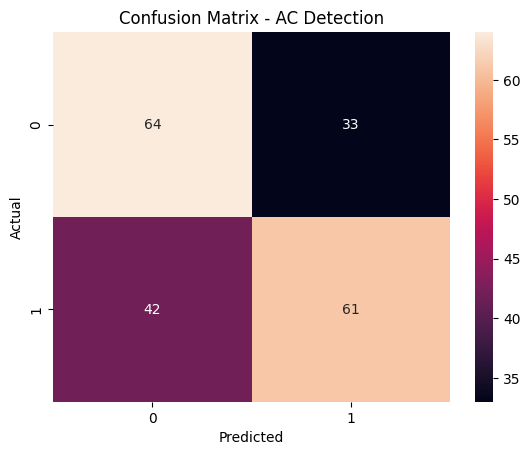

In [46]:
cm = confusion_matrix(y_test, predictions)

plt.figure()
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - AC Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SECTION 5: Feature Importance

Functionality:
This block shows which features contribute most to appliance detection.
It proves the model is learning meaningful patterns from the power signal.

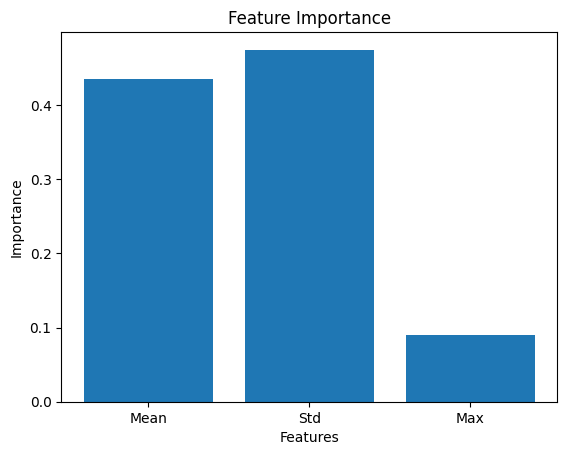

In [47]:
importances = model.feature_importances_

plt.figure()
plt.bar(["Mean", "Std", "Max"], importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

This block trains separate machine learning models to detect the ON/OFF status of each appliance using statistical features extracted from the total smart meter signal.

In [48]:
# ==============================
# MULTI-APPLIANCE TRAINING BLOCK
# ==============================

# Define appliances
appliances = ["Fan_ON", "Fridge_ON", "AC_ON", "Heater_ON"]

# Input features
X = data[["Mean", "Std", "Max"]]

# Dictionary to store trained models
appliance_models = {}

for appliance in appliances:

    y = data[appliance]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)

    print(f"{appliance} Detection Accuracy: {accuracy:.2f}")

    # Store trained model
    appliance_models[appliance] = model

Fan_ON Detection Accuracy: 0.61
Fridge_ON Detection Accuracy: 0.57
AC_ON Detection Accuracy: 0.57
Heater_ON Detection Accuracy: 0.59


This block uses trained AI models to predict which appliances are ON or OFF at a given time using only total smart meter features


In [49]:
# ==============================
# MULTI-APPLIANCE TRAINING BLOCK
# ==============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define appliance labels
appliances = ["Fan_ON", "Fridge_ON", "AC_ON", "Heater_ON"]

# Feature columns
feature_columns = ["Mean", "Std", "Max"]

# Input features
X = data[feature_columns]

# Dictionary to store models
appliance_models = {}

for appliance in appliances:

    y = data[appliance]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    print(f"{appliance} Detection Accuracy: {accuracy:.2f}")

    # Store model correctly
    appliance_models[appliance] = model

print("\nModels Stored:", appliance_models.keys())

Fan_ON Detection Accuracy: 0.60
Fridge_ON Detection Accuracy: 0.56
AC_ON Detection Accuracy: 0.56
Heater_ON Detection Accuracy: 0.59

Models Stored: dict_keys(['Fan_ON', 'Fridge_ON', 'AC_ON', 'Heater_ON'])


In [50]:

# ==============================
# APPLIANCE STATUS PREDICTION
# ==============================

time_index = 500

sample_features = data.loc[[time_index], feature_columns]

print(f"\nPredicted Appliance Status at Time {time_index}:\n")

for appliance in appliances:

    prediction = appliance_models[appliance].predict(sample_features)

    status = "ON" if prediction[0] == 1 else "OFF"

    print(f"{appliance.replace('_ON','')} → {status}")


Predicted Appliance Status at Time 500:

Fan → OFF
Fridge → OFF
AC → ON
Heater → OFF


SECTION 6: Fault Detection

Functionality:
This block identifies high power spikes that may indicate overload or unsafe conditions.
It highlights potential fault points for safety monitoring. And also this block checks for overload conditions and prints which appliances are active during high power usage to generate clear fault warnings.

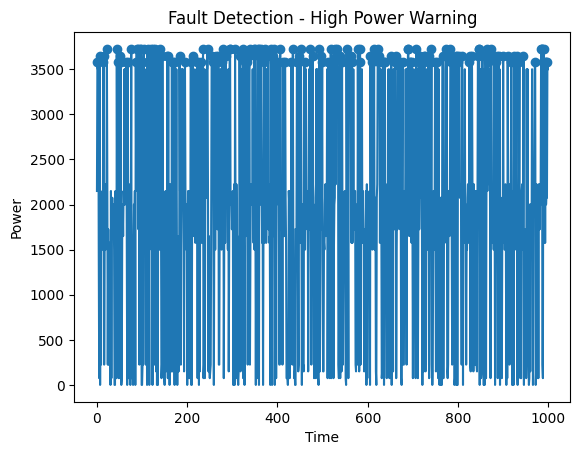

In [51]:
data["Fault"] = data["Total_Power"] > 3500

plt.figure()
plt.plot(time, total_power)
plt.scatter(time[data["Fault"]], total_power[data["Fault"]])
plt.title("Fault Detection - High Power Warning")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

In [52]:
fault_indices = data[data["Total_Power"] > 3500].index

for i in fault_indices:
    active_devices = []

    if data.loc[i, "Fan_ON"] == 1:
        active_devices.append("Fan")
    if data.loc[i, "Fridge_ON"] == 1:
        active_devices.append("Fridge")
    if data.loc[i, "AC_ON"] == 1:
        active_devices.append("AC")
    if data.loc[i, "Heater_ON"] == 1:
        active_devices.append("Heater")

    print(f"⚠ Fault Warning at Time {i}: High Load Detected")
    print("Active Appliances:", active_devices)
    print("Total Power:", data.loc[i, "Total_Power"], "Watts")
    print("-" * 50)

⚠ Fault Warning at Time 1: High Load Detected
Active Appliances: ['Fan', 'AC', 'Heater']
Total Power: 3575 Watts
--------------------------------------------------
⚠ Fault Warning at Time 6: High Load Detected
Active Appliances: ['Fridge', 'AC', 'Heater']
Total Power: 3650 Watts
--------------------------------------------------
⚠ Fault Warning at Time 14: High Load Detected
Active Appliances: ['Fan', 'AC', 'Heater']
Total Power: 3575 Watts
--------------------------------------------------
⚠ Fault Warning at Time 15: High Load Detected
Active Appliances: ['Fridge', 'AC', 'Heater']
Total Power: 3650 Watts
--------------------------------------------------
⚠ Fault Warning at Time 22: High Load Detected
Active Appliances: ['Fan', 'Fridge', 'AC', 'Heater']
Total Power: 3725 Watts
--------------------------------------------------
⚠ Fault Warning at Time 44: High Load Detected
Active Appliances: ['Fan', 'Fridge', 'AC', 'Heater']
Total Power: 3725 Watts
-------------------------------------

SECTION 7: Anomaly Detection

Functionality:
This block detects unusual or abnormal energy usage patterns automatically.
It uses unsupervised learning to identify rare or unexpected events.

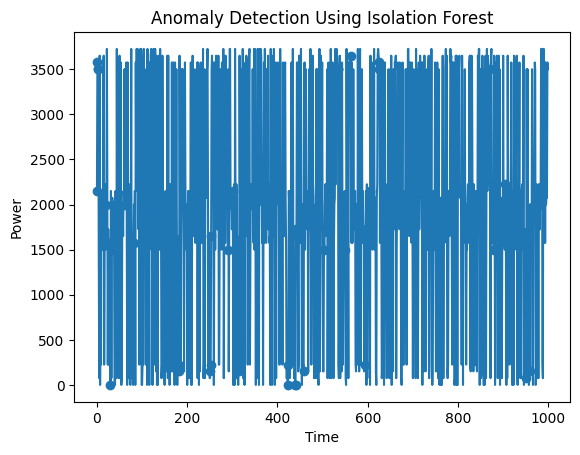

In [53]:
iso = IsolationForest(contamination=0.05)
data["Anomaly"] = iso.fit_predict(X)

plt.figure()
plt.plot(time, total_power)
plt.scatter(time[data["Anomaly"] == -1], total_power[data["Anomaly"] == -1])
plt.title("Anomaly Detection Using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

SECTION 8: Energy Awareness Dashboard (Pie Chart)

Functionality:
This graph shows percentage energy contribution of each appliance.
It helps users understand which device consumes the most power.

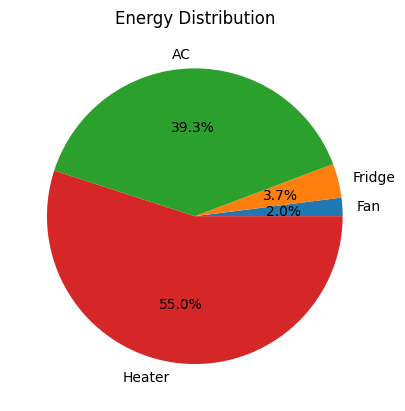

In [54]:
energy = {
    "Fan": fan.sum(),
    "Fridge": fridge.sum(),
    "AC": ac.sum(),
    "Heater": heater.sum()
}

plt.figure()
plt.pie(energy.values(), labels=energy.keys(), autopct='%1.1f%%')
plt.title("Energy Distribution")
plt.show()

Bar Graph
This enables energy awareness and helps consumers reduce wastage.

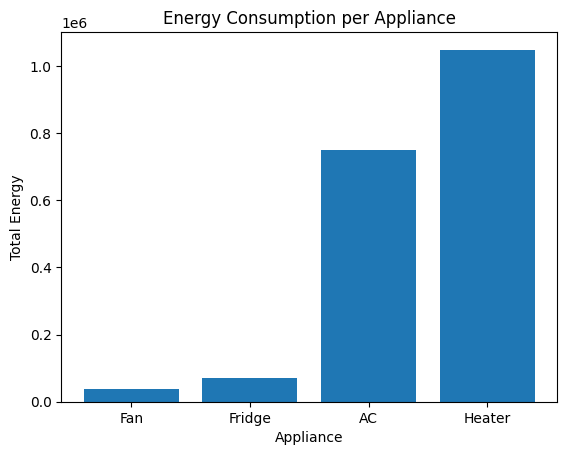

In [55]:
plt.figure()
plt.bar(energy.keys(), energy.values())
plt.title("Energy Consumption per Appliance")
plt.xlabel("Appliance")
plt.ylabel("Total Energy")
plt.show()

*Developed an AI-based appliance detection system using a single smart meter.

*Applied machine learning (Random Forest) to identify appliance ON/OFF status from power features.

*Eliminates need for multiple sensors → cost-effective & scalable solution.

*Enables real-time energy monitoring and awareness dashboard.

*Contributes to smart energy management and power conservation.